In [2]:
# 初次安装时运行此代码
# !pip install pycaret
# !pip install shap

说明文档

https://pycaret.readthedocs.io/en/latest/api/classification.html

模型是用了sklearn，相关参数可以在下面链接中搜

https://scikit-learn.org/stable/modules/classes.html

## 导入安装包

In [3]:
import pandas as pd
import numpy as np

from pycaret.classification import *

## 读取数据

1) csv 数据读取格式：

pd.read_csv("xxx.csv")

pd.read_csv("xxx.csv", encoding='gb18030')

pd.read_csv("xxx.csv", encoding='utf-8')

如有需要，添加参数 engine='python'

2) xlsx读取格式：

pd.read_excel("xxx.xlsx")

In [4]:
df = pd.read_csv("CTG.csv")

In [5]:
# 查看下数据
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [6]:
# 稍微处理下数据
df = df.drop(["FileName","Date","SegFile","b","e"],axis=1) # 去掉几个变量
df = df.dropna() # 去掉空值

## 在数据准备好以后，开始建模

## 第一步：初始化配置

**data**填入 数据集名称 （**必填**）

**target**填入 因变量名称 （**必填**）

其它常用**可填**参数：

**train_size**: 训练集占比，默认值 0.7

**test_data**：测试数据。输入测试数据，会忽略train_size对数据的划分，此时传入的data为训练数据。

**normalize**: True/False, 是否对数值型数进行标准化

**normalize_method**: 标准化方法：'zscore'，'minmax', 'maxabs', 'robust'

**fold_strategy**: 交叉验证策略， 默认为'stratifiedkfold'，可选'kfold'，'stratifiedkfold'，'groupkfold'，'timeseries'

**fold**: K折交叉验证的K

**fix_imbalance**：数据不平衡时设置为True，将采用SMOTE方法为样本较少的类别合成新数据

**session_id**: seed。最好设置一下，否则每次跑的结果都不一样

另外的一些参数，如设置PCA降维，去除异常值，特征选择等，请看详细的说明文档

In [7]:
clf = setup(data=df, target='NSP')
# 在确定各设置无误后，按下enter键

,Description,Value
0,session_id,5968
1,Target,NSP
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2126, 35)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
models() # 列出可用的建模方法

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 第二步——可选步骤：比较所有模型（通过交叉验证）

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9913,0.9957,0.9814,0.9913,0.9912,0.9760,0.9761,0.6050
lightgbm,Light Gradient Boosting Machine,0.9899,0.9979,0.9794,0.9900,0.9898,0.9722,0.9725,0.3380
rf,Random Forest Classifier,0.9893,0.9971,0.9763,0.9893,0.9891,0.9703,0.9706,0.8070
catboost,CatBoost Classifier,0.9886,0.9978,0.9746,0.9886,0.9884,0.9684,0.9688,13.4670
gbc,Gradient Boosting Classifier,0.9866,0.9983,0.9737,0.9866,0.9864,0.9629,0.9632,1.8250
ridge,Ridge Classifier,0.9852,0.0000,0.9648,0.9854,0.9849,0.9588,0.9596,0.0720
lda,Linear Discriminant Analysis,0.9845,0.9948,0.9645,0.9847,0.9842,0.9570,0.9578,0.0590
dt,Decision Tree Classifier,0.9839,0.9729,0.9670,0.9838,0.9836,0.9553,0.9557,0.0370
ada,Ada Boost Classifier,0.9832,0.9918,0.9695,0.9835,0.9831,0.9539,0.9544,0.2780
lr,Logistic Regression,0.9798,0.9937,0.9576,0.9802,0.9797,0.9442,0.9449,1.7840


In [10]:
# 返回的是最好的那个模型
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5968, verbose=0,
                     warm_start=False)

也可以指定几个模型进行比较，使用include参数

best_model = compare_models(include = ['dt','rf','et'])

## 第三步：创建模型（在create_model中填入你想要创建的模型）

可以参考上面的compare_models的结果，可以创建自己想要研究的模型

#### 可选模型：

‘lr’ - Logistic Regression

‘knn’ - K Neighbors Classifier

‘nb’ - Naive Bayes

‘dt’ - Decision Tree Classifier

‘svm’ - SVM - Linear Kernel

‘rbfsvm’ - SVM - Radial Kernel

‘gpc’ - Gaussian Process Classifier

‘mlp’ - MLP Classifier

‘ridge’ - Ridge Classifier

‘rf’ - Random Forest Classifier

‘qda’ - Quadratic Discriminant Analysis

‘ada’ - Ada Boost Classifier

‘gbc’ - Gradient Boosting Classifier

‘lda’ - Linear Discriminant Analysis

‘et’ - Extra Trees Classifier

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Classifier

In [11]:
rf_classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9799,0.9881,0.9638,0.9796,0.9797,0.9447,0.9449
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9799,0.9908,0.9638,0.9796,0.9797,0.9447,0.9449
3,0.9866,0.9968,0.9805,0.9866,0.9866,0.9636,0.9636
4,0.9933,0.9999,0.9833,0.9933,0.9932,0.9816,0.9818
5,0.9933,1.0000,0.9833,0.9933,0.9932,0.9816,0.9818
6,0.9933,0.9999,0.9833,0.9933,0.9932,0.9816,0.9818
7,0.9799,0.9962,0.9500,0.9804,0.9792,0.9433,0.9451
8,0.9932,1.0000,0.9825,0.9933,0.9932,0.9811,0.9813
9,0.9932,0.9991,0.9722,0.9936,0.9932,0.9813,0.9814


In [12]:
rf_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5968, verbose=0,
                       warm_start=False)

也可以自定义参数传入，如

In [13]:
rf_classifier2 = create_model('rf', bootstrap=True, ccp_alpha=0.01,
                       criterion='gini', max_depth=20, max_features='auto',
                       min_samples_leaf=1, min_samples_split=2, n_estimators=100,
                       oob_score=True, random_state=1802)
                       
rf_classifier2

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9799,0.9916,0.9638,0.9796,0.9797,0.9447,0.9449
1,0.9799,0.9980,0.9500,0.9804,0.9792,0.9433,0.9451
2,0.9732,0.9810,0.9333,0.9740,0.9719,0.9235,0.9266
3,0.9799,0.9970,0.9638,0.9796,0.9797,0.9447,0.9449
4,0.9933,0.9968,0.9833,0.9933,0.9932,0.9816,0.9818
5,0.9866,0.9997,0.9667,0.9868,0.9863,0.9627,0.9634
6,0.9799,0.9971,0.9500,0.9804,0.9792,0.9433,0.9451
7,0.9732,0.9842,0.9333,0.9740,0.9719,0.9235,0.9266
8,0.9865,0.9985,0.9649,0.9867,0.9862,0.9617,0.9625
9,0.9797,0.9990,0.9389,0.9796,0.9794,0.9424,0.9431


RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=1802, verbose=0,
                       warm_start=False)

## 第四步——可选步骤：对create的model进行调参

n_iter: 网格搜索的迭代次数。默认是10，可增大次数。

optimize：调参度量方式，默认'Accuracy'，可选'AUC'，'Recall', 'Prec.', 'F1', 'Kappa', 'MCC'

默认调参方式为网格搜索，更多搜索方法见说明文档

In [1]:
tuned_rf_classifier = tune_model(rf_classifier, optimize='Accuracy')

NameError: name 'tune_model' is not defined

In [15]:
# 输出调参后的模型
tuned_rf_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=-1, oob_score=False, random_state=5968, verbose=0,
                       warm_start=False)

## 第五步：模型评价

‘auc’ - Area Under the Curve

‘threshold’ - Discrimination Threshold

‘pr’ - Precision Recall Curve

‘confusion_matrix’ - Confusion Matrix

‘error’ - Class Prediction Error

‘class_report’ - Classification Report

‘boundary’ - Decision Boundary

‘rfe’ - Recursive Feature Selection

‘learning’ - Learning Curve

‘manifold’ - Manifold Learning

‘calibration’ - Calibration Curve

‘vc’ - Validation Curve

‘dimension’ - Dimension Learning

‘feature’ - Feature Importance

‘feature_all’ - Feature Importance (All)

‘parameter’ - Model Hyperparameter

‘lift’ - Lift Curve

‘gain’ - Gain Chart

‘tree’ - Decision Tree

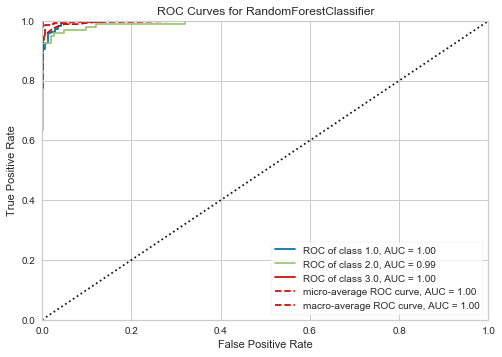

In [16]:
plot_model(tuned_rf_classifier, plot='auc')

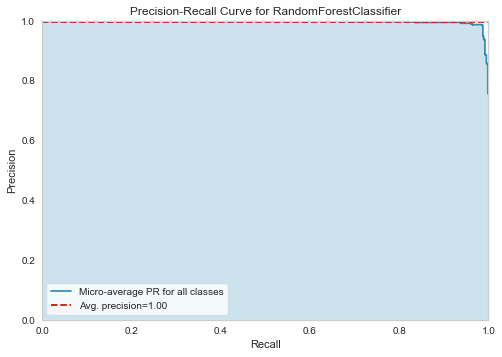

In [17]:
plot_model(tuned_rf_classifier, plot='pr')

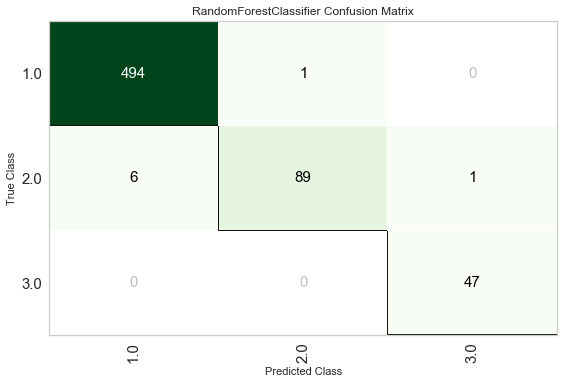

In [18]:
plot_model(tuned_rf_classifier,plot='confusion_matrix')

### 汇总输出（多分类模型中有些输出不支持，会报错，是正常现象）

In [19]:
evaluate_model(tuned_rf_classifier)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 模型解释

plot: str, default = ‘summary’. Type of plot. Available options are: ‘summary’, ‘correlation’, and ‘reason’.

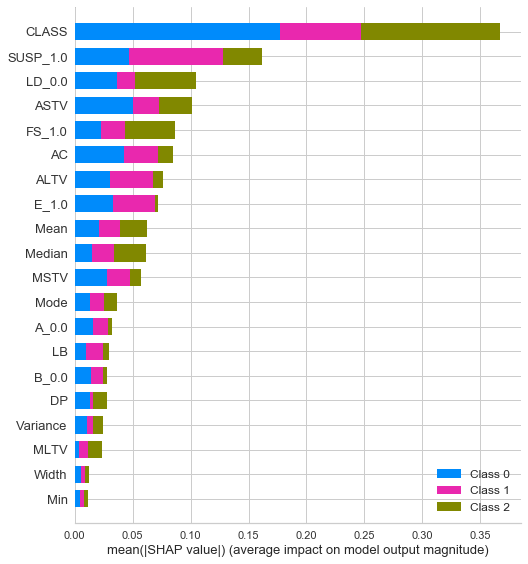

In [20]:
interpret_model(tuned_rf_classifier, plot='summary')

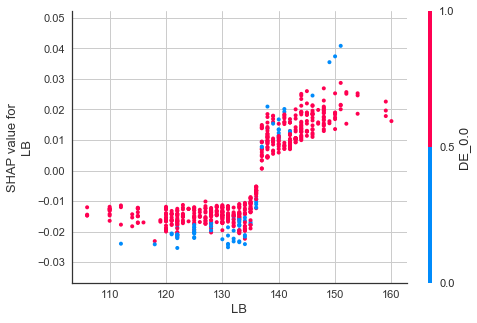

In [21]:
interpret_model(tuned_rf_classifier, plot='correlation')

In [22]:
interpret_model(tuned_rf_classifier, plot='reason')

### 也可以对创建的模型/调参后的模型进行校准，只需将校准对象输入

method: str, default = ‘sigmoid’
The method to use for calibration. Can be ‘sigmoid’ which corresponds to Platt’s method or ‘isotonic’ which is a non-parametric approach.

In [23]:
calibrated_rf = calibrate_model(rf_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9799,0.9911,0.9638,0.9796,0.9797,0.9447,0.9449
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9799,0.9921,0.9638,0.9796,0.9797,0.9447,0.9449
3,0.9866,0.9969,0.9805,0.9866,0.9866,0.9636,0.9636
4,0.9933,1.0000,0.9833,0.9933,0.9932,0.9816,0.9818
5,0.9933,1.0000,0.9833,0.9933,0.9932,0.9816,0.9818
6,0.9933,0.9999,0.9833,0.9933,0.9932,0.9816,0.9818
7,0.9799,0.9926,0.9500,0.9804,0.9792,0.9433,0.9451
8,0.9932,1.0000,0.9825,0.9933,0.9932,0.9811,0.9813
9,0.9932,0.9991,0.9722,0.9936,0.9932,0.9813,0.9814


In [24]:
calibrated_rf

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                               

## 第六步：模型预测

In [25]:
predictions = predict_model(tuned_rf_classifier) 
# 版本问题会有报错，不用在意

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9875,0.9972,0.9750,0.9875,0.9873,0.9657,0.9660


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
# 用于预测未知的数据集
# predictions = predict_model(final_rf, data = unseen_data)

## 第七步——可进行：得到最终模型（使用全部数据训练）

In [27]:
final_rf = finalize_model(tuned_rf_classifier)

In [28]:
final_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=210,
                       n_jobs=-1, oob_score=False, random_state=5968, verbose=0,
                       warm_start=False)